# HOW TO BE A DASKMASTER PART-2

# Description:-
We will be performing data analysis on a big dataset or it can be said that “We will Study The Data”
We’ll be eye reading the data of the given dataset to gain some valuable insights and we can do some data cleaning.
At last, we’ll prepare the given dataset for implementing the model. In the end, we’ll be able to predict the rating of any restaurant!

You can get the dataset from Here and then download it Legally and make sure you have enough space on your “Laptop”. Also, do use the Pip install method for downloading all the necessary Modules in Jupyter Notebook. Also also.. also… Charge your laptop.. things are about to get interesting!)

Assuming you are now on a standby mode to do some coding. ‘Assuming’ being the keyword here. :P
But first, let’s walk through the plan and see how things will work. So the Step-1 would be Importing all-important libraries step-2 would be some…bleh bleh…code and step-3 would be our accuracy score. Yayyy!

# Importing Important Libraries
Importing Pandas and NumPy. Sometimes, we have to use them because Dask is still in the development stage so there are things Dask does not support yet. We will switch between Pandas and Dask. And Importing Pyarrow because we can achieve more parallelism! I will show you how in the next steps…

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pyarrow
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Reading Data
Converting the Boring CSV file into the Parquet file as Parquets are Great. Using Pyarrow engine. to achieve some kickstart for more parallelism.

In [3]:
data=pd.read_csv("zomato.csv")

In [4]:
data.to_parquet('zomato.parquet', engine='pyarrow')

In [3]:
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='4GB')
client

Client Scheduler: tcp://127.0.0.1:58209 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 8.00 GB


In [2]:
data = dd.read_parquet('zomato.parquet', engine='pyarrow')

In [24]:
X=data

# After computing X you can see X will look something like this!!

In [3]:
data.compute()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,None,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,None,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [56]:
X["approx_cost(for two people)"].describe().compute()

unique      68
count     8752
top        300
freq      1475
Name: approx_cost(for two people), dtype: object

# We Can Analyze!!
* Which are cheap restaurants?
* Which are expensive restaurants?
* Which are reliable and high rating restaurants?
And whatnot…

If you are not a newbie in python and pandas then you will see that we are adding a keyword Meta when applying Lambda. now in Dask we have to provide a Meta keyword as the lambda will form a series output Hence, we have to give a column name and its dtype which is ‘a’ and ‘int32’ in this scenario. We’re providing ≤1500 because the expensive restaurant was a startling 6200 bucks! Now a cheap restaurant may be its 1/4th, which is 1500.

In [41]:
##cheap restra.
X= X.drop_duplicates(subset='name',keep='first')
df=X[['name','approx_cost(for two people)','location','rest_type','cuisines']].groupby(['approx_cost(for two people)'], sort = True)
newdf=df.apply(lambda x: x.mean() <= 1500,meta=("a","int32"))
newdf.compute()

This code will generate a Series of all The Expensive Restaurants. Providing ≥ 3000 because, you know it already, Smarty!


In [ ]:
##exp. restra
newdf_expensive=X[['name','approx_cost(for two people)','location','rest_type','cuisines']].groupby(['approx_cost(for two people)'], sort = True)
newdf_expensive=newdf_expensive.apply(lambda x: x.mean() >= 3000,meta=("b","int32"))
newdf_expensive.compute()

You will search for only those restaurants which have the highest rating. You might provide a filter of 4.5 rating on your phone app while searching for drool-worthy meals. Well providing ≥ 4.5 was simple logic using the same assumption and nothing else.


In [45]:
##hit restra.
newdf_hit=X[['name','rate']].groupby(['rate'], sort = True)
newdf_hit=newdf_hit.apply(lambda x: x.mean() >= 4.5,meta=("c","int32"))
newdf_hit.compute()

And providing ≥160 was not a fact, but a stat. You can see the line №7 from where we are deriving info. Our “votes column” provides us the mean, max, min, etc, but we are interested in the mean as all the reliable restaurants will lie above the mean.
So that’s all for data analysis. Well, we can find out some more interesting things about restaurants. Do share your conclusions with me in the comments.


In [53]:
##reliable restra.
X.votes.describe()
newdf_votes=X[['name','votes']].groupby(['votes'], sort = True)
newdf_votes=newdf_votes.apply(lambda x: x.mean() >= 160,meta=("d","int32"))
newdf_votes.compute()

# Well, we can also visualize some stuff.
run the below code to see some action.

Number of Restaurants that are localized to specific parts of the City.


Text(0.5, 1.0, 'locality')

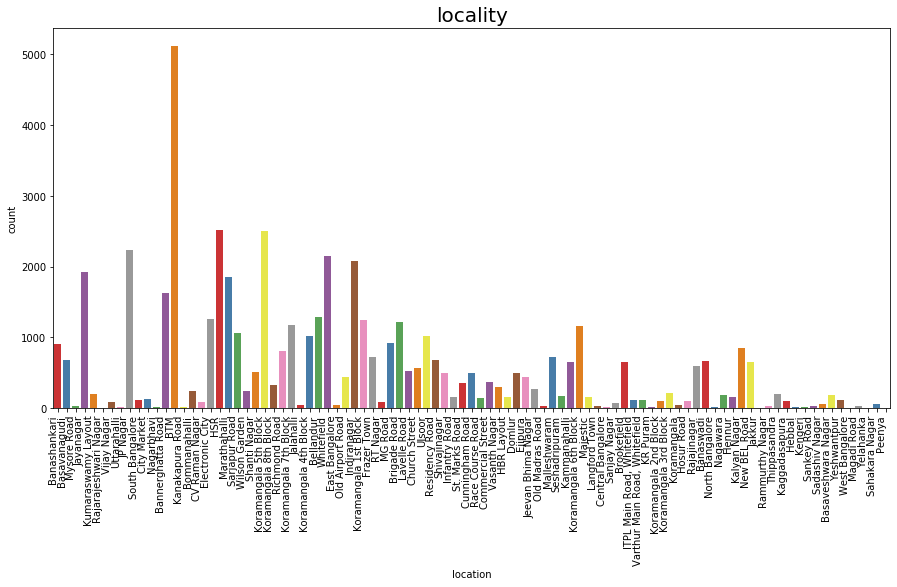

In [10]:
X=X.compute()
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="location",X=X, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 20)

# Restaurants of some specific types.

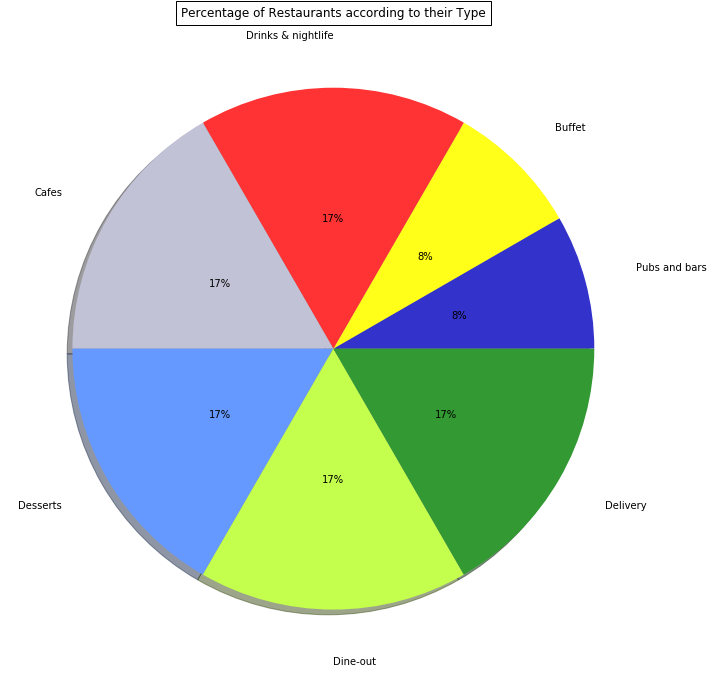

In [12]:
restaurantTypeCount=X['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

Now after playing with graphs and all… We can move on to some cleansing process of removing some irritating commas, hyphens e.t.c. Deleting some Columns bleh bleh…We can start by deleting some columns.
# Deleting Nugatory Columns

In [3]:
del(data["url"])
del(data["address"])
del(data["menu_item"])
del(data["dish_liked"])
del(data["listed_in(type)"])
del(data["phone"])
del(data["reviews_list"])
del(data["rest_type"])
del(data["cuisines"])

In [4]:
del(data["name"])

# Replacing Useless Stuff with Useful Stuff

In [6]:
data=client.persist(data)
for i in data:
    data=data.replace(" - ","")
data["rate"]=data["rate"].str.replace("/5","")
data["rate"]=data["rate"].str.replace("NEW","0.0")

In [7]:
data.compute()

,online_order,book_table,rate,votes,location,approx_cost(for two people),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,800,Banashankari
1,Yes,No,4.1,787,Banashankari,800,Banashankari
2,Yes,No,3.8,918,Banashankari,800,Banashankari
3,No,No,3.7,88,Banashankari,300,Banashankari
4,No,No,3.8,166,Basavanagudi,600,Banashankari
...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Whitefield,"1,500",Whitefield
51713,No,No,None,0,Whitefield,600,Whitefield
51714,No,No,None,0,Whitefield,"2,000",Whitefield
51715,No,Yes,4.3,236,"ITPL Main Road, Whitefield","2,500",Whitefield


# Finding Null Values and then Filling them

In [12]:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2).compute()
data["location"]=data["location"].fillna(method="ffill")
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].fillna(method="ffill")

The first line will show the percentage of null values in each column and by this, We see that there are only two columns which we’ll forward fill using “ffill’’.


# Preparing our Dataset for Model Implementation.
We’ll achieve this by making X and Y for training and testing.

In [8]:
Y=data.iloc[:,2]
del(data["rate"])
X=data

In [10]:
X=client.persist(X)

NameError: name 'client' is not defined

In [22]:
X.columns

Index(['name', 'online_order', 'book_table', 'votes', 'location',
       'approx_cost(for two people)', 'listed_in(city)'],
      dtype='object')

In [13]:
X.isnull().any().compute()

online_order                   False
book_table                     False
votes                          False
location                       False
approx_cost(for two people)    False
listed_in(city)                False
dtype: bool

We have our X and Y (ex and why…lol!) for implementing our dask.XgBoost Model but wait…we have to do some LabelEncoding. This way, we can go on without any errors and make our X and Y — all numeric.
For today, I think this is enough. We don’t want a brain explosion here…do we?
So we will all wait patiently for the next part in which we will do some LabelEncoding and implement our model. Until then, do some more analysis on some more datasets using Dask so that you can grasp more on this subject.
# THE END
